# 機械学習とは？

> The field of study that gives computers the ability to learn without being explicitly programmed.  
(Arthur Samuel)


## 教師あり学習 (Supervised Learning)

　入力と出力の関係が明らかな場合、その課題は教師あり学習と呼ばれます。

### 回帰分析 (regression)
入力から出力の具体的な数値を予測する課題


### 分類 (classification)
入力から出力のカテゴリーを予測する課題

  
## 教師なし学習 (Unsupervised Learning)

データに含まれる変数同士の関係を仮定せず、そのデータの構造を決定するとき、その課題は教師なし学習と呼ばれます。
教師なし学習の代表例は、クラスタリング(clustering)です。

### クラスタリング (clustering)
データ内の変数に基づき、データを複数の小さなグループに仕分けする。

# 単回帰分析 (Linear Regression with One Variable)　　

## 仮定関数 (Hypothesis function)

$h_\theta(x) = \theta_0 + \theta_1x$  


## 目的関数 (cost function)

仮定関数で算出した結果$h(X)$が、実際の値$Y$とどのくらいずれているかを計算する。  
二乗を計算し、足し合わせて、平均を取る。  
2で割られているのは、後々この関数J(θ0,θ1)J(θ0,θ1)を微分する際に計算しやすくするため

$ J(\theta_0, \theta_1) = \frac{1}{2m}\displaystyle{\sum_{i=1}^{m}}(h_\theta(x^{(i)}) - Y^{(i)})^2$

目標はこの目的関数が最小となるようなパラメータ$\theta_0, \theta_1$を見つけることである。

$\displaystyle{\min_{\theta_0, \theta_1}} \ J(\theta_0, \theta_1)$

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
%matplotlib inline

# データセットを読み込み
boston = load_boston()
boston_df = pd.DataFrame()
# 住居の平均部屋数
boston_df['RM'] = pd.DataFrame(boston.data, columns=boston.feature_names)['RM']
# 価格
boston_df['PRICE'] = boston.target
# 先頭を表示
boston_df.head()

,RM,PRICE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


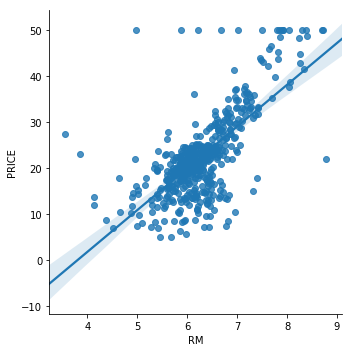

In [10]:
import seaborn as sns

sns.lmplot('RM', 'PRICE', boston_df, fit_reg=True)

# 最急降下法 (Gradient Descent)

最急降下法のアルゴリズムは以下の通りです。

1. $\theta_0, \theta_1$に何らかの値を設定する。
2. $J(\theta_0, \theta_1)$を減少させるように$\theta_0, \theta_1$を変化させていく
3. $J(\theta_0, \theta_1)$が最小となり、$\theta_0, \theta_1$は局所的最適解（Local Optima）となる。

仮定関数$h\theta(X)$と、そのパフォーマンスを定量する目的関数$J(\theta_0, \theta_1)$が決まったところで、実際に$\theta_0, \theta_1$を動かしていきます。 
目的関数$J(\theta_0, \theta_1)$を最小にする$\theta_0, \theta_1$を見つける方法の1つが、最急降下法 (Gradient Descent)です。

$
\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_j) \ \ (for \ j = 0 \ and \ j = 1) \\
\theta_j - \alpha\displaystyle{\sum_{i=1}^{m}}(h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)} \\
$

$\alpha\frac{\partial}{\partial\theta_j}J(\theta_j)$部分は導関数項になり、局所的最適解に近づくにつれて値は小さくなります。  
$\alpha$は学習率といい、1回のイテレーションでどのくらい$J(\theta_0, \theta_1)$を動かすかを決める定数です。  
    ここで、イテレーションの中で$\theta_0, \theta_1$の値を更新する時は以下のように2つの変数を同時に更新するようにします。

$
temp0 := \theta_0 - \alpha\frac{\partial}{\partial\theta_0}J(0) = \theta_0 - \alpha\frac{1}{m}\displaystyle{\sum_{i=1}^{m}}(h_\theta(x^{(i)}) - y^{(i)})\\
temp1 := \theta_1 - \alpha\frac{\partial}{\partial\theta_1}J(0) = \theta_0 - \alpha\frac{1}{m}\displaystyle{\sum_{i=1}^{m}}(h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)}\\
\\
\theta_0 := temp0 \\
\theta_1 := temp1 \\
$

今回は変数が2つあるので、片方は定数として微分する、偏微分を使用する。

### 学習率 (Learning Rate)

$\alpha$は学習率といい、1回のイテレーションでどのくらい$J(\theta_0, \theta_1)$を動かすかを決める定数です。  

$\alpha$が大きすぎると、目的関数の変動幅（導関数項）が大きすぎ、収束しないことも。逆に$\alpha$が小さいと変動幅が小さ過ぎて局所的最適解にたどり着くまで多くの時間を要します。

### 導関数 (Derivative)

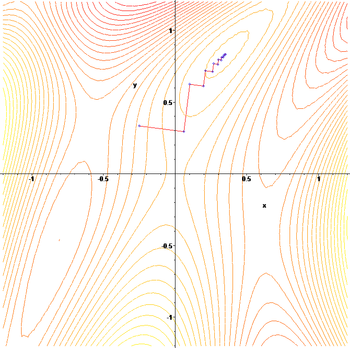

In [3]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Gradient_ascent_%28contour%29.png/350px-Gradient_ascent_%28contour%29.png'
from IPython.display import Image
Image(url, width=250, height=200)

以下はwikipediaに掲載されているサンプルコード
>The gradient descent algorithm is applied to find a local minimum of the function f(x)=x4−3x3+2, with derivative f'(x)=4x3−9x2. 

In [4]:
# From calculation, it is expected that the local minimum occurs at x=9/4

cur_x = 6 # The algorithm starts at x=6
gamma = 0.01 # step size multiplier
precision = 0.00001
previous_step_size = cur_x

def df(x):
    return 4 * x**3 - 9 * x**2

while previous_step_size > precision:
    prev_x = cur_x
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)

print("The local minimum occurs at %f" % cur_x)

The local minimum occurs at 2.249965
